In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer , OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Datasets/train.csv")

In [3]:
df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.drop(["name","cabin","ticket","embarked"] , axis =1 , inplace=True)

In [5]:
df

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [6]:
O = OrdinalEncoder(categories = [["male" , "female"]])

In [7]:
O.fit_transform(df[["sex"]])

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [8]:
df["sex"] = O.fit_transform(df[["sex"]])

In [9]:
df

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,0.0,22.0,1,0,7.2500
1,1,1,1.0,38.0,1,0,71.2833
2,1,3,1.0,26.0,0,0,7.9250
3,1,1,1.0,35.0,1,0,53.1000
4,0,3,0.0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0.0,27.0,0,0,13.0000
887,1,1,1.0,19.0,0,0,30.0000
888,0,3,1.0,NaN,1,2,23.4500
889,1,1,0.0,26.0,0,0,30.0000


In [10]:
df["age"].fillna(df["age"].mean(),inplace =True)

In [11]:
df.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [12]:
df.info()   # gives the information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    float64
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 48.9 KB


<Axes: xlabel='age', ylabel='Density'>

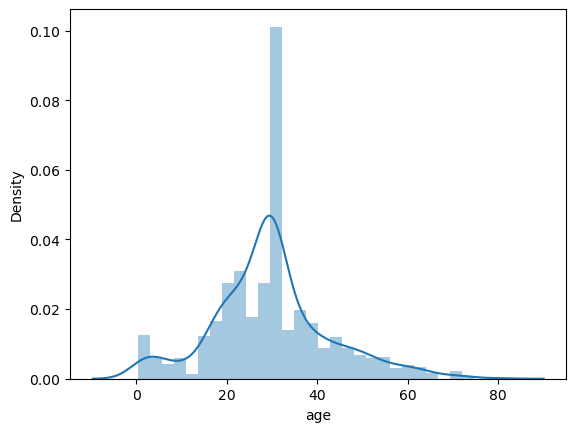

In [13]:
sns.distplot(df["age"])   # for  see distribution of data

In [14]:
# before power transformation with apply algorithem

x_train , x_test , y_train , y_test = train_test_split(df.drop(["survived"] , axis = 1),df["survived"],test_size = 0.3,random_state = 21)

In [15]:
l = LogisticRegression()

In [16]:
l.fit(x_train , y_train)

LogisticRegression()

In [17]:
y_pre= l.predict(x_test)

In [18]:
accuracy_score( y_test , y_pre)

0.8171641791044776

# box -cox method and yeo-johnson method

In [19]:
p = PowerTransformer(method = "box-cox")  # OR p = PowerTransformation()

In [20]:
p.fit_transform(x_train[["age"]])  #appline power transformation on age

array([[ 0.04244116],
       [-0.4702628 ],
       [ 0.7187896 ],
       [ 2.46701035],
       [-0.39206661],
       [ 0.92997652],
       [-0.23752524],
       [ 0.04244116],
       [ 0.04244116],
       [ 1.88061036],
       [ 1.74790485],
       [ 1.74790485],
       [-0.62867002],
       [ 0.13926207],
       [ 0.04244116],
       [ 1.27563349],
       [-0.87191772],
       [-1.20900618],
       [ 0.64770531],
       [-0.23752524],
       [ 0.78952269],
       [ 0.04244116],
       [ 1.13826734],
       [-0.08526534],
       [ 1.27563349],
       [-1.03842169],
       [-0.7900229 ],
       [-0.54911862],
       [-0.16112293],
       [ 0.92997652],
       [ 0.04244116],
       [ 0.04244116],
       [-0.7900229 ],
       [-1.03842169],
       [-0.54911862],
       [ 2.27339931],
       [-2.27585347],
       [-2.39657966],
       [ 0.04244116],
       [ 0.78952269],
       [ 0.04244116],
       [ 0.04244116],
       [ 0.43223133],
       [-0.23752524],
       [ 0.04244116],
       [-0

In [21]:
x_train["age"] = p.fit_transform(x_train[["age"]])

In [22]:
x_train

,pclass,sex,age,sibsp,parch,fare
241,3,1.0,0.042441,1,0,15.5000
734,2,0.0,-0.470263,0,0,13.0000
581,1,1.0,0.718790,1,1,110.8833
456,1,0.0,2.467010,0,0,26.5500
118,1,0.0,-0.392067,0,1,247.5208
...,...,...,...,...,...,...
368,3,1.0,0.042441,0,0,7.7500
48,3,0.0,0.042441,2,0,21.6792
772,2,1.0,1.946619,0,0,10.5000
824,3,0.0,-2.396580,4,1,39.6875


<Axes: ylabel='Density'>

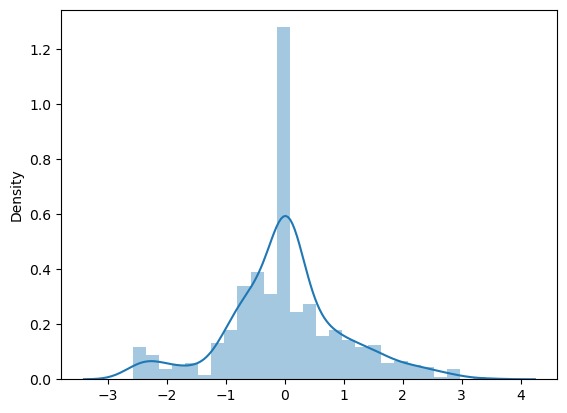

In [23]:
sns.distplot(x_train[["age"]])

In [24]:
l = LogisticRegression()

In [25]:
l.fit(x_train , y_train)

LogisticRegression()

In [26]:
y_pre= l.predict(x_test)

In [27]:
accuracy_score( y_test , y_pre)

0.6007462686567164